CS 548 Assignment 2

Gabriella Guzman-Jerry and Leah Maciel

Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

ModuleNotFoundError: No module named 'imblearn'

Access the dataset and convert into a Pandas dataframe

To access the csv you need to either upload the file to your google drive and connect Colab to your Google Drive, or upload the csv in the files panel on the left

In [2]:
df = pd.read_csv("Covid Data.csv")

# Task 2- EDA

To get an overall understanding of the data let's use df.describe()

In [3]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


Now let's analyze some distributions of the data using histograms. Looking at the distribution of age and sex can be helpful when trying to associate age with the risk of death from Covid-19

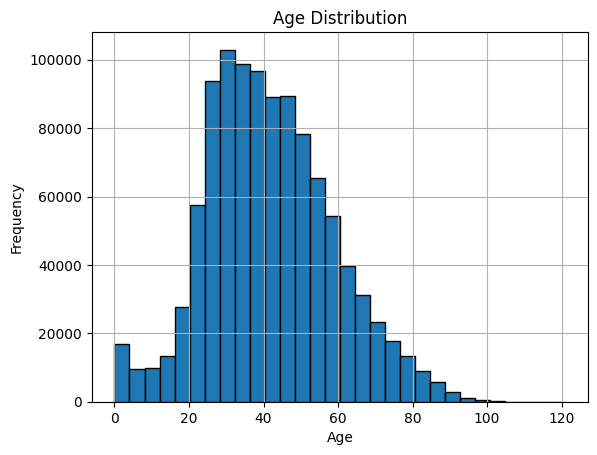

In [4]:
df['AGE'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

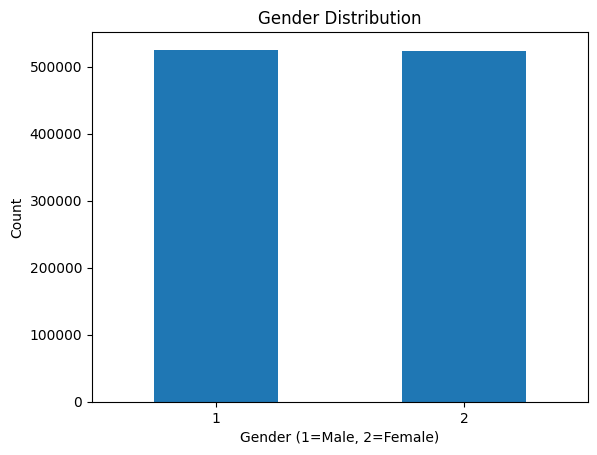

In [5]:
df['SEX'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Count')
plt.xticks(rotation=0) # for better readability I used a rotation = 0
plt.show()

To have a better understanding of the prevalence of diseases a bar graph can be made displaying all the diseases and their counts

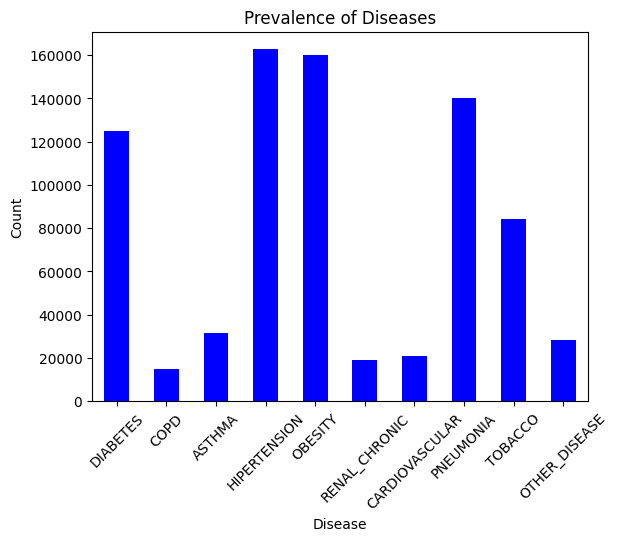

In [6]:
# create a list of the disease columns
disease_columns = ['DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION', 'OBESITY', 'RENAL_CHRONIC', 'CARDIOVASCULAR', 'PNEUMONIA', 'TOBACCO', 'OTHER_DISEASE']

# initialize the dictionary
disease_counts = {}

# loop through each disease to determine Yes(1) or No(0)
for disease in disease_columns:
    count = df[disease].value_counts().get(1, 0)
    disease_counts[disease] = count

# Convert to a data frame for better readability
counts_df = pd.DataFrame(list(disease_counts.items()), columns=['Disease', 'Count'])

counts_df.plot(x='Disease', y='Count', kind='bar', legend=False, color='blue')
plt.title('Prevalence of Diseases')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Another analysis that is interesting to visualize if the amount of people in the data set who have survived with Covid or had died from it.

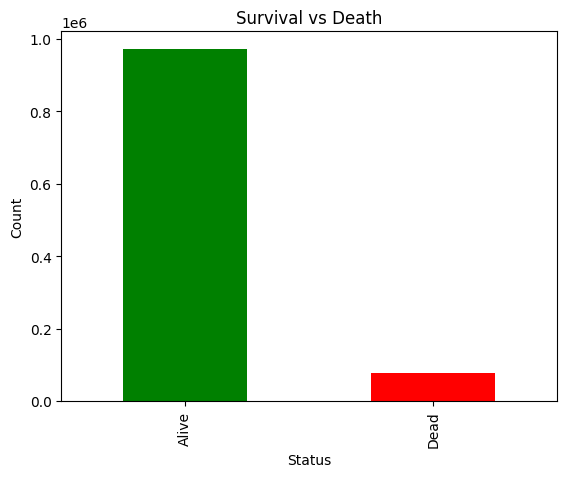

In [7]:
# There are too many unique values in 'DATE_DIED' so I needed to convert 'DATE_DIED'
# to a simpler 'Survival' column which determined if the patient was Alive (1) or Dead (0)
# Adapted from https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/
df['Survival'] = df['DATE_DIED'].apply(lambda x: 'Alive' if x == '9999-99-99' else 'Dead')

df['Survival'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Survival vs Death')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

Chi-Square tests can be run to check for associations between Covid death or survival and other health risks. However, these chi-square tests are imbalanced because of the large amount of survivors vs those who died. We accounted for this by balancing the data a few cells down.

In [8]:
contingency_table = pd.crosstab(df['Survival'], df['PNEUMONIA'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')
# Print the contingency table (observed counts)
print(contingency_table)


Chi-square statistic: 231020.0210697449
P-value: 0.0
Degrees of freedom: 2
Expected frequencies: 
[[129762.3365558  827041.92644494  14828.73699926]
 [ 10275.6634442   65492.07355506   1174.26300074]]
PNEUMONIA     1       2      99
Survival                       
Alive      86115  870249  15269
Dead       53923   22285    734


In [9]:
contingency_table = pd.crosstab(df['Survival'], df['CARDIOVASCULAR'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')
# Print the contingency table (observed counts)
print(contingency_table)

Chi-square statistic: 7398.924643491524
P-value: 0.0
Degrees of freedom: 2
Expected frequencies: 
[[1.92450190e+04 9.49537691e+05 2.85029026e+03]
 [1.52398102e+03 7.51923092e+04 2.25709741e+02]]
CARDIOVASCULAR     1       2     98
Survival                           
Alive           16334  952956  2343
Dead             4435   71774   733


In [10]:
contingency_table = pd.crosstab(df['Survival'], df['DIABETES'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')
# Print the contingency table (observed counts)
print(contingency_table)

Chi-square statistic: 50065.83176915999
P-value: 0.0
Degrees of freedom: 2
Expected frequencies: 
[[1.15817597e+05 8.52722337e+05 3.09306531e+03]
 [9.17140275e+03 6.75256626e+04 2.44934693e+02]]
DIABETES     1       2     98
Survival                     
Alive     96724  872302  2607
Dead      28265   47946   731


In [11]:
contingency_table = pd.crosstab(df['Survival'], df['PREGNANT'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')
# Print the contingency table (observed counts)
print(contingency_table)

Chi-square statistic: 7219.6708712800655
P-value: 0.0
Degrees of freedom: 3
Expected frequencies: 
[[7.53436609e+03 4.75523116e+05 4.85096978e+05 3.47854019e+03]
 [5.96633910e+02 3.76558841e+04 3.84140222e+04 2.75459808e+02]]
PREGNANT    1       2       97    98
Survival                            
Alive     8042  485933  473971  3687
Dead        89   27246   49540    67


Examining the correlation between Survival and Sex

In [12]:
contingency_table = pd.crosstab(df['Survival'], df['SEX'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')
# Print the contingency table (observed counts)
print(contingency_table)


Chi-square statistic: 6944.357267904874
P-value: 0.0
Degrees of freedom: 1
Expected frequencies: 
[[486536.02223208 485096.97776792]
 [ 38527.97776792  38414.02223208]]
SEX            1       2
Survival                
Alive     497662  473971
Dead       27402   49540


In [13]:
# survival variable is highly imbalanced and may create inaccuracy with the chi-square results
print(df['Survival'].value_counts())
print(df['PNEUMONIA'].value_counts())
print(df['CARDIOVASCULAR'].value_counts())
print(df['DIABETES'].value_counts())
print(df['PREGNANT'].value_counts())
print(df['SEX'].value_counts())

Survival
Alive    971633
Dead      76942
Name: count, dtype: int64
PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64
CARDIOVASCULAR
2     1024730
1       20769
98       3076
Name: count, dtype: int64
DIABETES
2     920248
1     124989
98      3338
Name: count, dtype: int64
PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64
SEX
1    525064
2    523511
Name: count, dtype: int64


In [14]:
from sklearn.utils import resample

# Separate alive and dead patients
alive = df[df['Survival'] == 'Alive']
dead = df[df['Survival'] == 'Dead']

# Undersample the alive group to match the size of the dead group
alive_undersampled = resample(alive,
                              replace=False,     # Sample without replacement
                              n_samples=len(dead),  # Match the size of the dead group
                              random_state=42)   # Reproducibility

# Combine the undersampled alive group with the dead group
df_balanced = pd.concat([alive_undersampled, dead])

# Now perform the Chi-Square test on the balanced dataset
contingency_table = pd.crosstab(df_balanced['Survival'], df_balanced['PNEUMONIA'])


chi2, p, dof, expected = stats.chi2_contingency(contingency_table)


print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')
print("Observed counts:\n", contingency_table)

Chi-square statistic: 60471.476072650454
P-value: 0.0
Degrees of freedom: 2
Expected frequencies: 
[[30373.5 45598.5   970. ]
 [30373.5 45598.5   970. ]]
Observed counts:
 PNEUMONIA     1      2     99
Survival                     
Alive       6824  68912  1206
Dead       53923  22285   734


In [15]:
contingency_table = pd.crosstab(df_balanced['Survival'], df_balanced['DIABETES'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')
print("Observed counts:\n", contingency_table)

Chi-square statistic: 15934.658092592455
P-value: 0.0
Degrees of freedom: 2
Expected frequencies: 
[[17964.5 58513.    464.5]
 [17964.5 58513.    464.5]]
Observed counts:
 DIABETES     1      2    98
Survival                   
Alive      7664  69080  198
Dead      28265  47946  731


In [16]:
contingency_table = pd.crosstab(df_balanced['Survival'], df_balanced['OBESITY'])


chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')
print("Observed counts:\n", contingency_table)

Chi-square statistic: 1839.1451221340217
P-value: 0.0
Degrees of freedom: 2
Expected frequencies: 
[[14342.5 62143.    456.5]
 [14342.5 62143.    456.5]]
Observed counts:
 OBESITY      1      2    98
Survival                   
Alive     11391  65353  198
Dead      17294  58933  715


In [17]:
contingency_table = pd.crosstab(df_balanced['Survival'], df_balanced['HIPERTENSION'])


chi2, p, dof, expected = stats.chi2_contingency(contingency_table)


print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')
print("Observed counts:\n", contingency_table)

Chi-square statistic: 15744.481771062307
P-value: 0.0
Degrees of freedom: 2
Expected frequencies: 
[[21241.5 55261.5   439. ]
 [21241.5 55261.5   439. ]]
Observed counts:
 HIPERTENSION     1      2    98
Survival                       
Alive         10422  66332  188
Dead          32061  44191  690


In [18]:
contingency_table = pd.crosstab(df_balanced['Survival'], df_balanced['SEX'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)


print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')
print("Observed counts:\n", contingency_table)

Chi-square statistic: 3820.3948020620355
P-value: 0.0
Degrees of freedom: 1
Expected frequencies: 
[[33411.5 43530.5]
 [33411.5 43530.5]]
Observed counts:
 SEX           1      2
Survival              
Alive     39421  37521
Dead      27402  49540


# Task 4- Preprocessing

**Data Cleaning**

In [19]:
#make a copy of the df to clean
df_cleaned = df.copy()

In [20]:
#first look at the size of the df before cleaning
df_cleaned.shape

(1048575, 22)

Remove duplicate rows

In [21]:
#find and remove duplicate rows
duplicate_rows_df_cleaned = df_cleaned[df_cleaned.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df_cleaned.shape)
df_cleaned.drop_duplicates(inplace=True)

number of duplicate rows:  (812049, 22)


In [22]:
#check sizes after duplicates
print("size after removing duplicates:", df_cleaned.shape)

size after removing duplicates: (236526, 22)


Find and remove null values

In [23]:
#find null/missing values
df_cleaned.isnull().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


There are no entries with a null value. However, according the metadata, missing values are represented as 97 - 99

In [24]:
#finding entries with values 97 - 99
missing_values = df_cleaned.isin([97, 98, 99])
print(missing_values.sum())

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 105387
PNEUMONIA                 7187
AGE                        308
PREGNANT                131457
DIABETES                  2840
COPD                      2529
ASTHMA                    2506
INMSUPR                   2926
HIPERTENSION              2620
OTHER_DISEASE             4362
CARDIOVASCULAR            2603
OBESITY                   2554
RENAL_CHRONIC             2531
TOBACCO                   2738
CLASIFFICATION_FINAL         0
ICU                     105536
Survival                     0
dtype: int64


In [25]:
print("Percent of rows with missing INTUBED:", (105387/229143) * 100)
print("Percent of rows with missing PREGNANT:", (129503/229143)* 100)
print("Percent of rows with missing ICU:", (105536/229143)* 100)


Percent of rows with missing INTUBED: 45.99180424451107
Percent of rows with missing PREGNANT: 56.51623658588741
Percent of rows with missing ICU: 46.056829141627716


For `INTUBED`, `PREGNANT`, and `ICU` almost  half of the entries have missing values. For these features, it makes more sense to drop the features rather than drop the rows with missing values, or try to infer the values. Although we will be losing some information by dropping these features, including them could lead to noisy results or needing to drop many rows

In [26]:
#drop those features with half missing values
df_cleaned.drop(['INTUBED', 'PREGNANT', 'ICU'], axis=1, inplace=True)
#check that we removed 3 features
print("size after dropping features:", df_cleaned.shape)

size after dropping features: (236526, 19)


In [27]:
#now we need to remove the remaining missing values
#first convert to NA
df_cleaned.replace([97, 98, 99], pd.NA, inplace=True)

df_cleaned = df_cleaned.dropna()

#check that we removed the missing rows
print("size after removing missing values:", df_cleaned.shape)

size after removing missing values: (222368, 19)


In [28]:
#check to make sure there's no more missing values
missing_values = df_cleaned.isin([97, 98, 99])
print(missing_values.sum())

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
PNEUMONIA               0
AGE                     0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
Survival                0
dtype: int64


Find and remove outliers. For this dataset since most of the features are categorical, it only makes sense to check `AGE`

In [29]:
q1 = df_cleaned['AGE'].quantile(0.25)
q3 = df_cleaned['AGE'].quantile(0.75)
IQR = q3 - q1

outliers = ((df_cleaned['AGE'] < (q1 - 1.5 * IQR)) | (df_cleaned['AGE'] > (q3 + 1.5 * IQR))).sum()

print("Number of outliers:", outliers)

df_cleaned_no_outliers = df_cleaned[(df_cleaned['AGE'] >= (q1 - 1.5 * IQR)) & (df_cleaned['AGE'] <= (q3 + 1.5 * IQR))]

df_cleaned = df_cleaned_no_outliers

Number of outliers: 34


Check the dataframe after cleaning

In [30]:
df_cleaned.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Survival
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,1,2,2,2,2,2,3,Dead
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,1,2,2,1,1,2,5,Dead
2,2,1,2,2,09/06/2020,2,55,1,2,2,2,2,2,2,2,2,2,3,Dead
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,7,Dead
4,2,1,2,1,21/06/2020,2,68,1,2,2,2,1,2,2,2,2,2,3,Dead


In [31]:
print("size after cleaning:", df_cleaned.shape)

size after cleaning: (222334, 19)


**Data Transformation and Normalization**

Transform the `DATE_DIED` feature. Instead of having all the different dates (including all 9s for having not died) we want to transform it into a binary feature. 0 representing did not die, and 1 representing did die. This will become the feature we predict

In [32]:
#turn DATE_DIED into a binary feature and drop DATE_DIED
df_cleaned['DIED_BINARY'] = df_cleaned['Survival'].apply(lambda x: 0 if x == 'Alive' else 1)
df_cleaned.drop('DATE_DIED', axis=1, inplace=True)
df_cleaned.drop('Survival', axis=1, inplace=True)

Reformat the remaining binary features. Right now no is represented as 2 instead of the standard 0. For ease of working with the data and convert these to 0

In [33]:
nonbinary= ['MEDICAL_UNIT', 'AGE', 'CLASIFFICATION_FINAL'] #exclude these features since they aren't binary
df_cleaned.loc[:, ~df_cleaned.columns.isin(nonbinary)] = df_cleaned.loc[:, ~df_cleaned.columns.isin(nonbinary)].replace(2, 0)

<ipython-input-33-1b8268632a90>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned.loc[:, ~df_cleaned.columns.isin(nonbinary)] = df_cleaned.loc[:, ~df_cleaned.columns.isin(nonbinary)].replace(2, 0)


We also want to reformat `CLASIFFICATION_FINAL` to make it easier to work with. Values 1-3 represent different degrees of covid a patient was diagnosed with. Values 4 or higher mean the patient wasn't a carrier or an inconclusive test. To make the feature easier to work with we can assign all values > 4 to 0, representing the patient not being a carrier of covid or conclusive results.

In [34]:
df_cleaned['CLASIFFICATION_FINAL'] = df_cleaned['CLASIFFICATION_FINAL'].apply(lambda x: x if x <= 3 else 0)

Next we want to confirm that all the features have the correct number of values before finishing transformation

In [35]:
df_cleaned.nunique()

,0
USMER,2
MEDICAL_UNIT,13
SEX,2
PATIENT_TYPE,2
PNEUMONIA,2
AGE,105
DIABETES,2
COPD,2
ASTHMA,2
INMSUPR,2


For normalization, we need to ensure that all of the features are on the same scale before applying classification techniques. Since the majority of the features are binary, it makes sense to standardize the nonbinary features to a binary scale.

In [36]:
#from this resource: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler()
df_cleaned[nonbinary] = scaler.fit_transform(df_cleaned[nonbinary])


Separate the cleaned data frame into features and label for classification

In [37]:
X = df_cleaned.drop('DIED_BINARY', axis=1)
y = df_cleaned['DIED_BINARY']

Check the dataframe after transformation and normalization

In [38]:
df_cleaned.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED_BINARY
0,0,0.0,1,1,1,0.607477,0,0,0,0,1,0,0,0,0,0,1.0,1
1,0,0.0,0,1,1,0.672897,0,0,0,0,1,0,0,1,1,0,0.0,1
2,0,0.0,0,0,0,0.514019,1,0,0,0,0,0,0,0,0,0,1.0,1
3,0,0.0,1,1,0,0.495327,0,0,0,0,0,0,0,0,0,0,0.0,1
4,0,0.0,0,1,0,0.635514,1,0,0,0,1,0,0,0,0,0,1.0,1


Now the data has been cleaned and transformed so that all features are on a similar scale of 0-1

# Task 5 – Model Selection, Training, and Optimization

Split the data for training (80%) and testing (20%)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Decision Tree**

In [40]:
# Basic implementation of decision tree Adapted from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
vanilla_decision_tree = DecisionTreeClassifier()
vanilla_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
# Feature Engineering by Adding Polynomial Features Adapted from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

decision_tree_poly = GaussianNB()
decision_tree_poly.fit(X_train_poly, y_train)
dec_pred_poly = decision_tree_poly.predict(X_test_poly)
print(f"F1 score with polynomial features: {f1_score(y_test, dec_pred_poly)}")

F1 score with polynomial features: 0.6615848979383026


In [42]:
# Decision Tree with Class Weight Adjustment (balanced for class imbalance) Adapted from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.htm
balanced_decision_tree = DecisionTreeClassifier(class_weight='balanced')
balanced_decision_tree.fit(X_train, y_train)
y_pred_tree_balanced = balanced_decision_tree.predict(X_test)
print(f"Decision Tree (Balanced) F1 score: {f1_score(y_test, y_pred_tree_balanced)}")

Decision Tree (Balanced) F1 score: 0.6584262888151945


In [43]:
# Hyperparameter Tuning with GridSearchCV for Decision Tree Adapted from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_params_tree = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

grid_search_tree = GridSearchCV(DecisionTreeClassifier(), grid_params_tree, cv=5, scoring='f1')
grid_search_tree.fit(X_train, y_train)
grid_decision_tree = grid_search_tree.best_estimator_
print("Best parameters for Decision Tree: ", grid_decision_tree.get_params())

Best parameters for Decision Tree:  {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


**Naive Bayes**

In [44]:
# Basic implementation of naive bayes Adapted from https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
vanilla_naive_bayes = GaussianNB()
vanilla_naive_bayes.fit(X_train, y_train)

GaussianNB()

In [45]:
# Perform 5-fold cross-validation and use F1 score for evaluation Adapted from https://scikit-learn.org/stable/modules/cross_validation.html
cv_scores = cross_val_score(vanilla_naive_bayes, X_train, y_train, cv=5, scoring='f1')

# Print cross-validation scores and the mean score
print(f"Cross-validation F1 scores: {cv_scores}")
print(f"Mean F1 score: {cv_scores.mean()}")

Cross-validation F1 scores: [0.67560949 0.67305082 0.67934723 0.67766479 0.67528746]
Mean F1 score: 0.6761919573363272


In [46]:
# Feature engineering with polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

naive_bayes_poly = GaussianNB()
naive_bayes_poly.fit(X_train_poly, y_train)
y_pred_poly = naive_bayes_poly.predict(X_test_poly)
print(f"F1 score with polynomial features: {f1_score(y_test, y_pred_poly)}")

F1 score with polynomial features: 0.6615848979383026


In [47]:
# Balance naive bayes

# Compute the class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_priors = class_weights / class_weights.sum()  # Normalize to get probabilities

# Instantiate Naive Bayes with custom class priors
balanced_naive_bayes = GaussianNB(priors=class_priors)

# Fit the model
balanced_naive_bayes.fit(X_train, y_train)

# Predict and evaluate
y_pred_naive_bayes = balanced_naive_bayes.predict(X_test)
print(f"Naive Bayes (Balanced) F1 score: {f1_score(y_test, y_pred_naive_bayes)}")

Naive Bayes (Balanced) F1 score: 0.6775337792098779


In [48]:
# Handling class imbalance with SMOTE Adapted from https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

naive_bayes_smote = GaussianNB()
naive_bayes_smote.fit(X_resampled, y_resampled)
y_pred_smote = naive_bayes_smote.predict(X_test)
print(f"F1 score after handling class imbalance (SMOTE): {f1_score(y_test, y_pred_smote)}")

F1 score after handling class imbalance (SMOTE): 0.676790200118547


**KNN**

In [49]:
# Basic implementation of knn https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
vanilla_knn = KNeighborsClassifier()
vanilla_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
# Feature Scaling Adapted from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate KNN on scaled features
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate performance
print(f"F1 score after feature scaling: {f1_score(y_test, y_pred_scaled)}")

F1 score after feature scaling: 0.667207079406897


In [51]:
# Had to reduce the grid size and search over fewer hyperparameter combinations
param_grid_knn = {
    'n_neighbors': [3, 5],  # Smaller set of neighbors
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']  # Simplified to only one distance metric
}

# 3-fold cross-validation and use all CPU cores for parallelization
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1', n_jobs=-1, verbose=1)


grid_search_knn.fit(X_train_scaled, y_train)

# Evaluate the best model
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test_scaled)

# Print the best parameters and F1 score
print(f"Best hyperparameters: {grid_search_knn.best_params_}")
print(f"F1 score after hyperparameter tuning: {f1_score(y_test, y_pred_best_knn)}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
F1 score after hyperparameter tuning: 0.667207079406897


In [52]:
# Dimensionality Reduction with PCA Adapted from https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Choose the number of components to keep
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train and evaluate KNN on reduced features
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

# Evaluate performance
print(f"F1 score after PCA: {f1_score(y_test, y_pred_pca)}")

F1 score after PCA: 0.6651334257787398


**Logistic Regression**

In [53]:
#used this documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html
#the basic implementation of logistic regression without changing any hyperparameters
vanilla_log_reg = LogisticRegression()
vanilla_log_reg = vanilla_log_reg.fit(X_train, y_train)

In [54]:
#introducing feature engineering by adding polynomial (interaction) features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_log_reg = LogisticRegression(max_iter = 1000) #set max_iter to 1000 since it didn't converge when max_iter=100
poly_log_reg = poly_log_reg.fit(X_train_poly, y_train)

In [55]:
#since the class labels are unbalanced, use the values of y to adjust weights- inversely proportional to class frequencies
balanced_log_reg = LogisticRegression(class_weight='balanced')
balanced_log_reg = balanced_log_reg.fit(X_train, y_train)

In [56]:
#used this documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html, https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
#using grid search to find the best hyperparameters to use
#takes a while to run (~7 minutes)

#create a dictionary of different parameters to test
grid_params = {'C': [0.1, 1, 10, 100],
     'solver': ['lbfgs', 'liblinear', 'sag'],
     'penalty': ['l2'],
     'class_weight': ['balanced', None],
     'max_iter': [100, 500, 1000]}

grid_search = GridSearchCV(LogisticRegression(), grid_params, cv=5, scoring='f1') #find the best combination based on f1 score
grid_search.fit(X_train, y_train)
grid_log_reg = grid_search.best_estimator_
print("Best parameters: ", grid_log_reg.get_params())

Best parameters:  {'C': 1, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


**SVM**

In [57]:
#used this documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
#the basic implementation of SVM without changing any hyperparameters
vanilla_SVM = LinearSVC() #using linear because it takes hours to run without using a linear SVM
vanilla_SVM = vanilla_SVM.fit(X_train, y_train)

In [58]:
#eliminate features to only use the top ones (feature engineering)
feature_SVM = LinearSVC()
feature_select = RFE(feature_SVM, n_features_to_select=10) #use half of the features
X_train_rfe = feature_select.fit_transform(X_train, y_train)
X_test_rfe = feature_select.transform(X_test)

feature_SVM = feature_SVM.fit(X_train_rfe, y_train)


In [59]:
#used this documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html, https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
#use grid search to find best parameter combination
grid_params = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [5000, 10000],
    'class_weight': [None, 'balanced']}

grid_search_svm = GridSearchCV(LinearSVC(), grid_params, cv=5, scoring='f1')
grid_search_svm.fit(X_train, y_train)

best_SVM = grid_search_svm.best_estimator_
print("Best parameters: ", grid_search_svm.best_params_)

Best parameters:  {'C': 1, 'class_weight': 'balanced', 'max_iter': 5000}


In [60]:
#used this documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#PCA for dimensionality reduction
PCA = PCA(n_components = 0.9) #keep 90% of variance
X_train_PCA = PCA.fit_transform(X_train)
X_test_PCA = PCA.transform(X_test)

PCA_SVM = LinearSVC()
PCA_SVM = PCA_SVM.fit(X_train_PCA, y_train)

# Task 6 – Model Evaluation

Function to evaluate a given model on test data. Prints the accuracy, precision, recall, and F1 score

In [61]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy: %.4f" % accuracy_score(y_test, y_pred))
    print("Precision: %.4f" % precision_score(y_test, y_pred))
    print("Recall: %.4f" % recall_score(y_test, y_pred))
    print("F1 score: %.4f" % f1_score(y_test, y_pred))

Decision Tree

In [62]:
print("vanilla decision tree")
evaluate_model(vanilla_decision_tree, X_train, y_train, X_test, y_test)

"""
vanilla decision tree
Accuracy: 0.7330
Precision: 0.6187
Recall: 0.6256
F1 score: 0.6222
"""

vanilla decision tree
Accuracy: 0.7435
Precision: 0.6124
Recall: 0.6202
F1 score: 0.6162


'\nvanilla decision tree\nAccuracy: 0.7330\nPrecision: 0.6187\nRecall: 0.6256\nF1 score: 0.6222\n'

In [84]:
print("polynomial decision tree")
evaluate_model(decision_tree_poly, X_train_poly, y_train, X_test_poly, y_test)

"""
polynomial decision tree
Accuracy: 0.7084
Precision: 0.5541
Recall: 0.8710
F1 score: 0.6773
"""

polynomial decision tree
Accuracy: 0.7025
Precision: 0.5316
Recall: 0.8757
F1 score: 0.6616


'\npolynomial decision tree\nAccuracy: 0.7084\nPrecision: 0.5541\nRecall: 0.8710\nF1 score: 0.6773\n'

In [64]:
print("balanced decision tree")
evaluate_model(balanced_decision_tree, X_train, y_train, X_test, y_test)
"""
balanced decision tree
Accuracy: 0.7352
Precision: 0.6032
Recall: 0.7199
F1 score: 0.6564
"""

balanced decision tree
Accuracy: 0.7452
Precision: 0.5934
Recall: 0.7394
F1 score: 0.6584


'\nbalanced decision tree\nAccuracy: 0.7352\nPrecision: 0.6032\nRecall: 0.7199\nF1 score: 0.6564\n'

In [65]:
print("grid search decision tree")
evaluate_model(grid_decision_tree, X_train, y_train, X_test, y_test)
"""
grid search decision tree
Accuracy: 0.7749
Precision: 0.6314
Recall: 0.8635
F1 score: 0.7294
"""

grid search decision tree
Accuracy: 0.7773
Precision: 0.6173
Recall: 0.8667
F1 score: 0.7211


'\ngrid search decision tree\nAccuracy: 0.7749\nPrecision: 0.6314\nRecall: 0.8635\nF1 score: 0.7294\n'

Naive Bayes

In [66]:
print("vanilla naive bayes")
evaluate_model(vanilla_naive_bayes, X_train, y_train, X_test, y_test)
"""
vanilla naive bayes
Accuracy: 0.7478
Precision: 0.6096
Recall: 0.7846
F1 score: 0.6862
"""

vanilla naive bayes
Accuracy: 0.7526
Precision: 0.5978
Recall: 0.7795
F1 score: 0.6767


'\nvanilla naive bayes\nAccuracy: 0.7478\nPrecision: 0.6096\nRecall: 0.7846\nF1 score: 0.6862\n'

In [67]:
print("polynomial naive bayes")
evaluate_model(naive_bayes_poly, X_train_poly, y_train, X_test_poly, y_test)
"""
polynomial naive bayes
Accuracy: 0.7084
Precision: 0.5541
Recall: 0.8710
F1 score: 0.6773
"""

polynomial naive bayes
Accuracy: 0.7025
Precision: 0.5316
Recall: 0.8757
F1 score: 0.6616


'\npolynomial naive bayes\nAccuracy: 0.7084\nPrecision: 0.5541\nRecall: 0.8710\nF1 score: 0.6773\n'

In [68]:
print("smote naive bayes")
evaluate_model(naive_bayes_smote, X_train, y_train, X_test, y_test)
"""
smote naive bayes
Accuracy: 0.7404
Precision: 0.5955
Recall: 0.8141
F1 score: 0.6879
"""

smote naive bayes
Accuracy: 0.7425
Precision: 0.5803
Recall: 0.8118
F1 score: 0.6768


'\nsmote naive bayes\nAccuracy: 0.7404\nPrecision: 0.5955\nRecall: 0.8141\nF1 score: 0.6879\n'

In [69]:
print("balanced naive bayes")
evaluate_model(balanced_naive_bayes, X_train, y_train, X_test, y_test)
"""
balanced naive bayes
Accuracy: 0.7335
Precision: 0.5834
Recall: 0.8448
F1 score: 0.6902
"""

balanced naive bayes
Accuracy: 0.7322
Precision: 0.5645
Recall: 0.8472
F1 score: 0.6775


'\nbalanced naive bayes\nAccuracy: 0.7335\nPrecision: 0.5834\nRecall: 0.8448\nF1 score: 0.6902\n'

KNN

In [70]:
print("vanilla knn")
evaluate_model(vanilla_knn, X_train, y_train, X_test, y_test)
"""
vanilla knn
Accuracy: 0.7711
Precision: 0.6717
Recall: 0.6818
F1 score: 0.6767
"""

vanilla knn
Accuracy: 0.7774
Precision: 0.6638
Recall: 0.6683
F1 score: 0.6660


'\nvanilla knn\nAccuracy: 0.7711\nPrecision: 0.6717\nRecall: 0.6818\nF1 score: 0.6767\n'

In [71]:
print("scaled knn")
evaluate_model(knn_scaled, X_train, y_train, X_test, y_test)
"""
Accuracy: 0.6615
Precision: 0.5214
Recall: 0.4462
F1 score: 0.4809
"""

scaled knn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.6714
Precision: 0.5060
Recall: 0.4456
F1 score: 0.4739


'\nAccuracy: 0.6615\nPrecision: 0.5214\nRecall: 0.4462\nF1 score: 0.4809\n'

In [72]:
print("grid search knn")
evaluate_model(grid_decision_tree, X_train, y_train, X_test, y_test)
"""
grid search knn
Accuracy: 0.7749
Precision: 0.6314
Recall: 0.8635
F1 score: 0.7294
"""

grid search knn
Accuracy: 0.7773
Precision: 0.6173
Recall: 0.8667
F1 score: 0.7211


'\ngrid search knn\nAccuracy: 0.7749\nPrecision: 0.6314\nRecall: 0.8635\nF1 score: 0.7294\n'

In [73]:
# Apply PCA transformation to both training and test data to account for number of features
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Now the transformed data has 10 features
print("pca knn")
evaluate_model(knn_pca, X_train_pca, y_train, X_test_pca, y_test)
"""
Accuracy: 0.6895
Precision: 0.5710
Recall: 0.2616
F1 score: 0.3588
"""

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


pca knn
Accuracy: 0.6895
Precision: 0.5710
Recall: 0.2616
F1 score: 0.3588


'\nAccuracy: 0.6895\nPrecision: 0.5710\nRecall: 0.2616\nF1 score: 0.3588\n'

Logistic regression

In [74]:
print("vanilla logistic regression")
evaluate_model(vanilla_log_reg, X_train, y_train, X_test, y_test)

"""
vanilla logistic regression
Accuracy: 0.7855
Precision: 0.6837
Recall: 0.6587
F1 score: 0.6710
"""

vanilla logistic regression
Accuracy: 0.7855
Precision: 0.6837
Recall: 0.6587
F1 score: 0.6710


'\nvanilla logistic regression\nAccuracy: 0.7855\nPrecision: 0.6837\nRecall: 0.6587\nF1 score: 0.6710\n'

In [75]:
print("polynomial logistic regression")
evaluate_model(poly_log_reg, X_train_poly, y_train, X_test_poly, y_test)

"""
polynomial logistic regression
Accuracy: 0.8006
Precision: 0.7040
Recall: 0.6897
F1 score: 0.6967
"""

polynomial logistic regression
Accuracy: 0.8006
Precision: 0.7040
Recall: 0.6897
F1 score: 0.6967


'\npolynomial logistic regression\nAccuracy: 0.8006\nPrecision: 0.7040\nRecall: 0.6897\nF1 score: 0.6967\n'

In [76]:
print("balanced logistic regression")
evaluate_model(balanced_log_reg, X_train, y_train, X_test, y_test)

"""
balanced logistic regression
Accuracy: 0.7652
Precision: 0.6086
Recall: 0.8210
F1 score: 0.6990
"""

balanced logistic regression
Accuracy: 0.7652
Precision: 0.6086
Recall: 0.8210
F1 score: 0.6990


'\nbalanced logistic regression\nAccuracy: 0.7652\nPrecision: 0.6086\nRecall: 0.8210\nF1 score: 0.6990\n'

In [77]:
print("grid search logistic regression")
evaluate_model(grid_log_reg, X_train, y_train, X_test, y_test)

"""
grid search logistic regression
Accuracy: 0.7653
Precision: 0.6087
Recall: 0.8212
F1 score: 0.6991
"""

grid search logistic regression
Accuracy: 0.7653
Precision: 0.6087
Recall: 0.8213
F1 score: 0.6992


'\ngrid search logistic regression\nAccuracy: 0.7653\nPrecision: 0.6087\nRecall: 0.8212\nF1 score: 0.6991\n'

SVM

In [78]:
print("vanilla SVM")
evaluate_model(vanilla_SVM, X_train, y_train, X_test, y_test)

"""
vanilla SVM
Accuracy: 0.7860
Precision: 0.6806
Recall: 0.6702
F1 score: 0.6754
"""

vanilla SVM
Accuracy: 0.7860
Precision: 0.6806
Recall: 0.6702
F1 score: 0.6754


'\nvanilla SVM\nAccuracy: 0.7860\nPrecision: 0.6806\nRecall: 0.6702\nF1 score: 0.6754\n'

In [79]:
print("feature engineered SVM")
evaluate_model(feature_SVM, X_train_rfe, y_train, X_test_rfe, y_test)

"""
feature engineered SVM
Accuracy: 0.7824
Precision: 0.6747
Recall: 0.6660
F1 score: 0.6703
"""

feature engineered SVM
Accuracy: 0.7824
Precision: 0.6747
Recall: 0.6660
F1 score: 0.6703


'\nfeature engineered SVM\nAccuracy: 0.7824\nPrecision: 0.6747\nRecall: 0.6660\nF1 score: 0.6703\n'

In [80]:
print("grid search SVM")
evaluate_model(best_SVM, X_train, y_train, X_test, y_test)

"""
grid search SVM
Accuracy: 0.7605
Precision: 0.6003
Recall: 0.8342
F1 score: 0.6982
"""

grid search SVM
Accuracy: 0.7605
Precision: 0.6003
Recall: 0.8342
F1 score: 0.6982


'\ngrid search SVM\nAccuracy: 0.7605\nPrecision: 0.6003\nRecall: 0.8342\nF1 score: 0.6982\n'

In [81]:
print("PCA SVM")
evaluate_model(PCA_SVM, X_train_PCA, y_train, X_test_PCA, y_test)

"""
PCA SVM
Accuracy: 0.7730
Precision: 0.6635
Recall: 0.6421
F1 score: 0.6526
"""

PCA SVM
Accuracy: 0.7730
Precision: 0.6635
Recall: 0.6421
F1 score: 0.6526


'\nPCA SVM\nAccuracy: 0.7730\nPrecision: 0.6635\nRecall: 0.6421\nF1 score: 0.6526\n'